<table ><tr><td valign='center' bgcolor='white'>
  <a href="https://web.facebook.com/DAT.KUSRC/" target="_blank"><img src="https://drive.google.com/uc?id=1dNBiKikzW1-osi6lleLOgSOKQ65IIfMC" height="50px"></a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</td><td valign='center' bgcolor='white'>
  <a href="https://www.ku.ac.th/" target="_blank"><img src="https://drive.google.com/uc?id=1ZfGOBmxAwg8SAhyseFziyinzxBGme78a" height="80px"></a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</td><td valign='center' bgcolor='white'>
<a href="https://www.tensorflow.org/" target="_blank"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1200px-TensorFlowLogo.svg.png" height="80px"></a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</td><td valign='center' bgcolor='white'>
  <a href="https://mike.cpe.ku.ac.th/" target="_blank"><img src="https://drive.google.com/uc?id=1s6r3iG_Slpu_NSWqdt5zBp8Z9hV0-zh6" height="50px"></a>
</td></tr></table>

---

<center><h1><b>Image Classifier for Rock, Paper, and Scissors</b></h1></center>

---
*   Acknowledgement: Most parts of this tutorail were extracted from [Machine Learning, Zero to Hero](https://www.youtube.com/watch?v=u2TjZzNuly8&t=86s), Google TensorFlow 2019.

In [1]:
print('Image Classifier for Rock, Paper, and Scissors...')
print('  Brought to you by K.Toto@MikeLab.Net')

Image Classifier for Rock, Paper, and Scissors...
  Brought to you by K.Toto@MikeLab.Net


## 1. Recall the Problem

![](https://drive.google.com/uc?id=1rJks1MAIu5a96fiJ-Ud8Vey5plS_8LCp)

Remember this? From the first tutorial where we showed a scenario of rock, paper, and scissors, and discussed how difficult it might be to create an application that recognizes hands of different shapes, sizes, ethnicities, decorations, and more.

![](https://drive.google.com/uc?id=1e--Xp5ivQkS0ff-3BnqLPJ77LA65sCR6)

We discussed how difficult it would be to write code to detect and classify these, even for something as simple as a rock, paper or scissors.

<center><img src=https://drive.google.com/uc?id=1btOZmXxqv4OcIHc5fVHoImRBalyZC93k></center>

But since then, we have looked into machine learning, and we have seen how to build neural networks, first to detect <font color=ff00ff>**patterns**</font> in raw pixels to classify them.

<center><img src=https://drive.google.com/uc?id=1vtuQNe4b5maIbbMT8rYnK0SU2tVaawxc></center>

And then to detect <font color=ff00ff>**features**</font> using <font color=ffff00>convolutions</font> (i.e., to have a <font color=ffff00>*convolution neural network*</font> <font color=00ffff>`trained`</font> <font color=00ff00>*to spot the particular features*</font> that make up an item like the [soles](https://www.google.com/search?q=sole+of+a+shoe) or the [silhouette](https://www.google.com/search?q=silhouette+of+a+shoe) of a shoe.

Here we will see how to create a neural network that is trained on data of rock, paper, and scissors, to detect and spot them.

## 2. The data

There is a dataset here that has several hundred images of rock, paper, and scissors poses. We will train a neural network with this data.

First of all, we have to download the zip files containing the data. The code to do that is as follows. One file has the training set, the other has a testing and validation set.

In [2]:
# map my GG drive
#from google.colab import drive
#drive.mount('/content/drive/')

## --> before open the # sign, look at the destination directory at the end 
##     of these wget commands!!
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip -O '/tmp/rps.zip'
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip -O '/tmp/rps-test-set.zip'

#print('Google Drive connected..')

--2022-07-03 07:57:52--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.183.128, 173.194.196.128, 173.194.74.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.183.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   294MB/s    in 0.7s    

2022-07-03 07:57:52 (294 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2022-07-03 07:57:52--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.161.128, 74.125.202.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.161.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘

### Exploring the data
In Python, we can unzip a file with the zip file library, and we unzip them to a temp directory like this.

In [5]:
import zipfile

## set your destination working (data path) directory here
#WORK_DIR = '/content/drive/My Drive/00_DAT/'
WORK_DIR = '/tmp'

def extractFile(WORK_DIR): 
  print('Extracring all zip files to ' + WORK_DIR + '/tmp') 
  local_zip = WORK_DIR + '/rps.zip'
  zip_ref = zipfile.ZipFile(local_zip, 'r')
  zip_ref.extractall(WORK_DIR + '/tmp')
  zip_ref.close()

  local_zip = WORK_DIR + '/rps-test-set.zip'
  zip_ref = zipfile.ZipFile(local_zip, 'r')
  zip_ref.extractall(WORK_DIR + '/tmp')
  zip_ref.close()
  print('WARNING: Do not forget to disable me extractFile() after first use (call)!!')

## The following line shoule be first run, only ONCE
# extractFile(WORK_DIR)

print('zipfile imported..')
print('\t>>Warning: Bofore proceeding to the next code block,\n\t  do not forget to configure your WORK_DIR //data// path..')

Extracring all zip files to /tmp/tmp
zipfile imported..
	>>Warning: Bofore proceeding to the next code block,
	  do not forget to configure your WORK_DIR //data// path..


This will create folders with sub-folders of each of our categories. When training in TensorFlow using an <font color=ff00ff>image data generator</font>, it will automatically label the images based on the name of their parent directory. So, we here don't need to create labels for the images.

<center><img src=https://drive.google.com/uc?id=1cl4LKGFi3WY70RC0XJ4uNoN_l-POnhdz></center>

In [6]:
import os

rock_dir = os.path.join(WORK_DIR + '/tmp/rps/rock')
paper_dir = os.path.join(WORK_DIR + '/tmp/rps/paper')
scissors_dir = os.path.join(WORK_DIR +'/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:5])

paper_files = os.listdir(paper_dir)
print(paper_files[:5])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:5])
print('Done..')

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock04-107.png', 'rock05ck01-075.png', 'rock01-086.png', 'rock07-k03-037.png', 'rock04-066.png']
['paper01-102.png', 'paper07-036.png', 'paper01-058.png', 'paper02-033.png', 'paper07-035.png']
['scissors03-032.png', 'scissors01-060.png', 'scissors04-051.png', 'scissors02-008.png', 'testscissors01-021.png']
Done..


/tmp/tmp/rps/rock/rock02-096.png


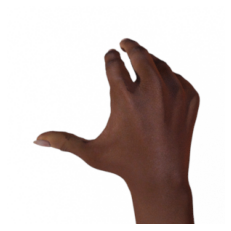

/tmp/tmp/rps/paper/paper03-079.png


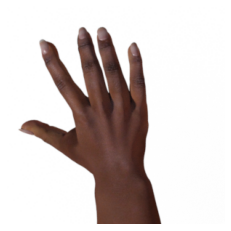

/tmp/tmp/rps/scissors/scissors03-047.png


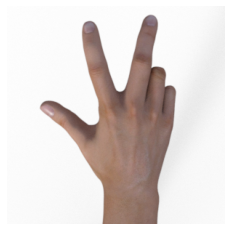

Done..


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 10
nbPix = 1

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-nbPix:pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-nbPix:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-nbPix:pic_index]]

for i, img_path in enumerate(next_rock + next_paper + next_scissors):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

print('Done..')

###Preparing the training data
So, we will achieve that with this code. This creates an image data generator that generates images for the training from the directory that they were downloaded. We can set up something called a <font color=ff00ff>training generator</font>, which as its name suggests, creates training data from that.

In [8]:
from keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = WORK_DIR + '/tmp/rps'
training_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (150, 150),
    class_mode = 'categorical'
)
print('Done..')

Found 2520 images belonging to 3 classes.
Done..


---
###Advanced Topic: Image augmentation test script

You can <font color=ff00ff>script</font> this code block, first, and go back here when you do your exercise later.

In [34]:
# DEBUG: image augmentation test using ImageDataGenerator
# Reference: https://www.kdnuggets.com/2020/02/easy-image-dataset-augmentation-tensorflow.html
from keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = WORK_DIR + '/tmp/rps'

training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      #vertical_flip=True,
      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)
print('Done..')

Found 2520 images belonging to 3 classes.
Done..


In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plotImages(images_arr):
  fig, axes = plt.subplots(1, 3, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip( images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
    plt.tight_layout()
    plt.show()
print('Done..')

Done..


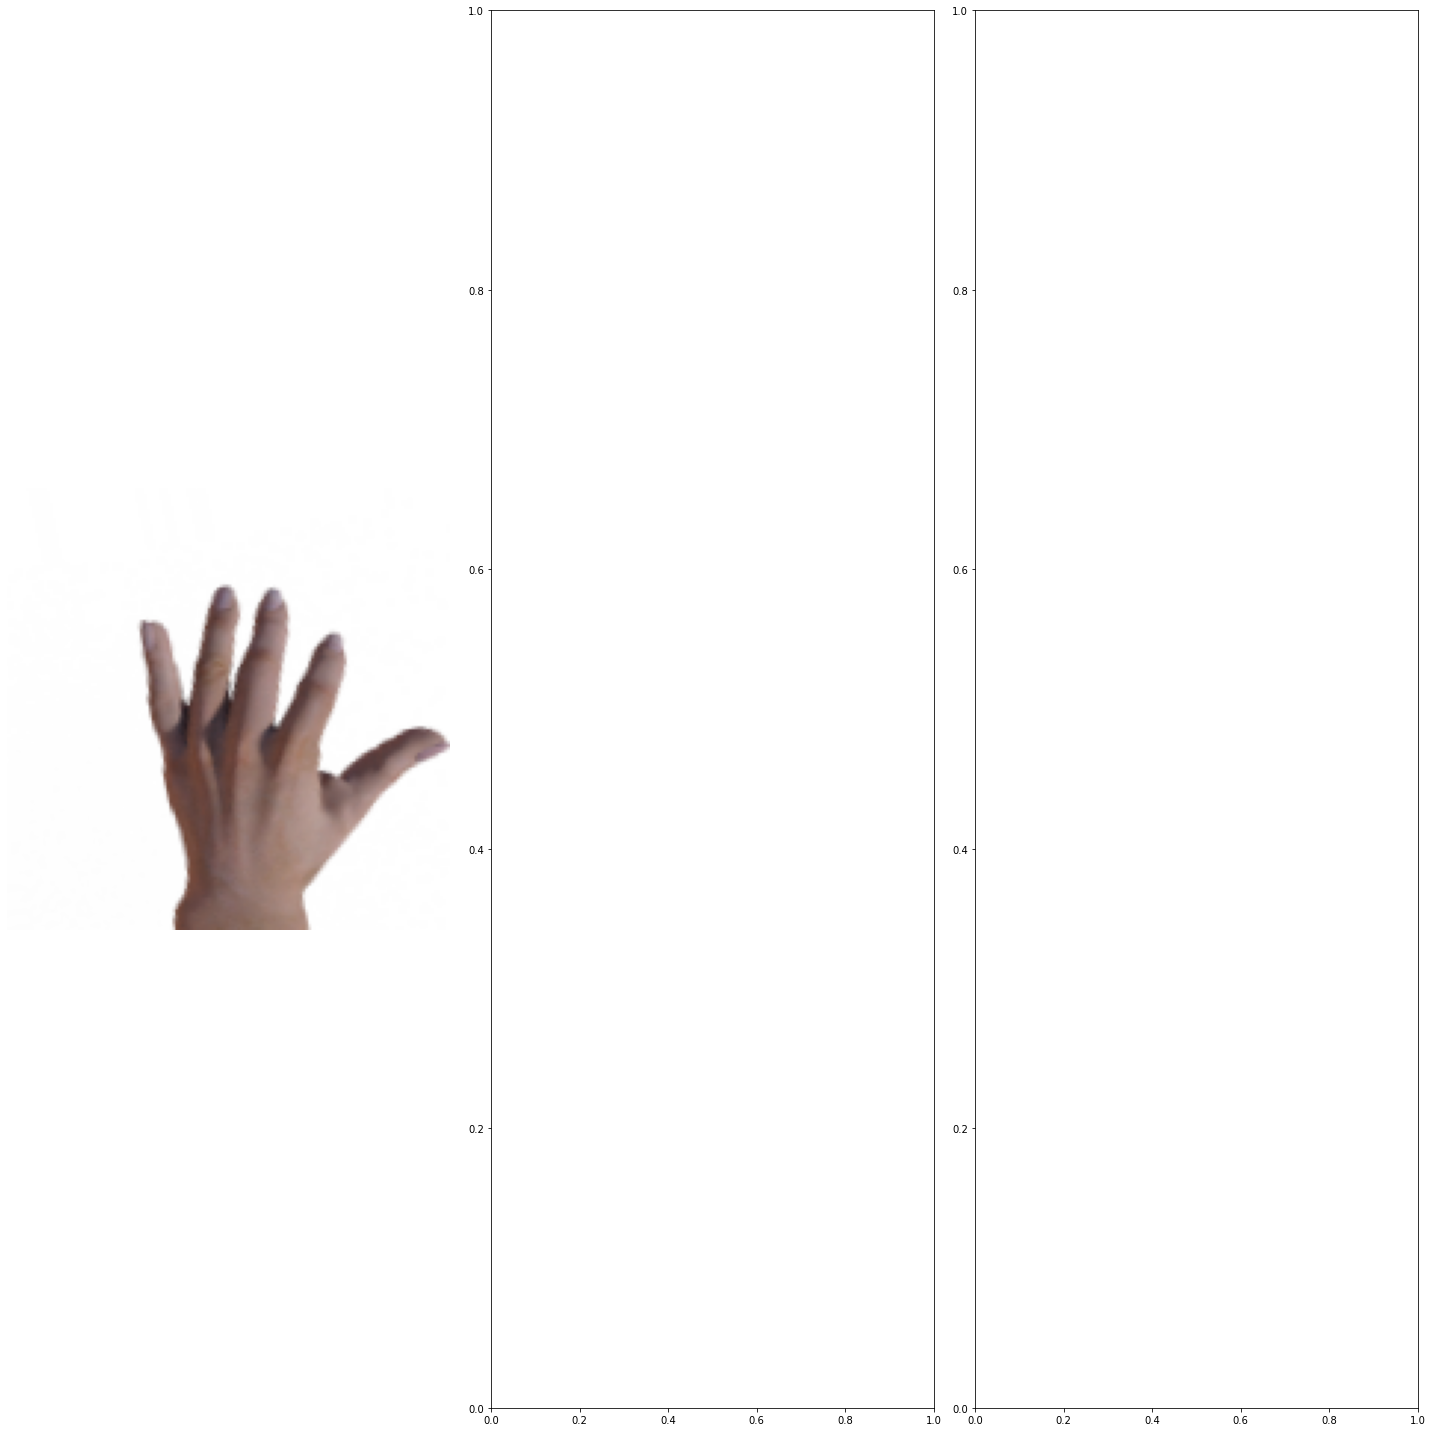

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [36]:
augmented_images = [train_generator[0][0][0] for i in range(3)]
plotImages(augmented_images)

###Preparing the testing data
We can do exactly the same for the test set with this code. And later, when we see the ```model.fit(...)```, we will see that we passed these in as the training and validation parameters.

In [37]:
VALIDATION_DIR = WORK_DIR + '/tmp/rps-test-set'

validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (150, 150),
    class_mode = 'categorical'
)
print('Done..')

Found 372 images belonging to 3 classes.
Done..


## 3. Build the model

Now let's look at our neuron network definition. This is very like what we have seen from the last tutorial, but just with more layers. 

One reason is that the rock, paper, and scissors' images are <font color=ff00ff>more complicated</font> than the grayscale clothing we saw previously, and another is that they are <font color=ff00ff>bigger</font>.

In [38]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  ## Note the input shape is the desired size of the image 150x150 with 3 bytes color
  #### This is the first convolution layer
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  #### The second convolution layer
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  #### The third convolution layer
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  #### The forth convolution layer
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  ##-------------------------------------------------------------------
  ## Dense layer as we have seen before
  ## Flatten the results to feed into a DNN
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  ## 512 neuron hidden layer
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()
#--------
from datetime import datetime
import pytz

tz_BKK = pytz.timezone('Asia/Bangkok') 
datetime_BKK = datetime.now(tz_BKK)
print("Current time:", datetime_BKK.strftime("%H:%M:%S %d/%m/%y"))
print('Done..')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

We can see that our input is now <font color=00ffff>150x150</font> pixel picture, with <font color=00ffff>3-byte</font> color depth. Our images are certainly bigger that they were before. And our output is a layer of the three neurons for the 3 classes of rock, paper, and scissors.

The middle part of the code is very similar to what we saw previously, but just more of it. So, here we have four <font color=ff00ff>layers of convolutions</font>, each with <font color=ff00ff>MaxPooling</font>. 

Before feeding into a dense layer, the <font color=ff00ff>dropout</font> is a little trick to improve the efficiency of a neuron network by throwing away some of the neurons.


---


We will then <font color=ff00ff>**compile**</font> the neuron network model as before with this code.

In [39]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop', 
              metrics = ['accuracy'])
print('Done..')

Done..


And then we can fit the data with the <font color=00ffff>```model.fit(...)```</font> call. Note that we don't have labels, as we are using the generator. it's inferring the labels from the parent directories of both the training and the validation datasets.

## 4. Fit the model

<font color='fffff00'>**Note that the fitting process takes very long time!**</font>


In [40]:
# This process takes a long time, so think twice before running this code block
history = model.fit_generator(train_generator, epochs=25, steps_per_epoch=20,
                              validation_data = validation_generator, 
                              verbose = 1, validation_steps=3)
print('-------')
print('model fitting, DONE..')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/25
20/20 [==============================] - 6s 289ms/step - loss: 2.3595 - accuracy: 0.3578 - val_loss: 1.0983 - val_accuracy: 0.3125
Epoch 2/25
20/20 [==============================] - 6s 275ms/step - loss: 1.1182 - accuracy: 0.3703 - val_loss: 1.0843 - val_accuracy: 0.3958
Epoch 3/25
20/20 [==============================] - 6s 274ms/step - loss: 1.1161 - accuracy: 0.3688 - val_loss: 1.1441 - val_accuracy: 0.2812
Epoch 4/25
20/20 [==============================] - 6s 276ms/step - loss: 1.1420 - accuracy: 0.4250 - val_loss: 1.0264 - val_accuracy: 0.6562
Epoch 5/25
20/20 [==============================] - 6s 280ms/step - loss: 1.0988 - accuracy: 0.4763 - val_loss: 0.8549 - val_accuracy: 0.7500
Epoch 6/25
20/20 [==============================] - 6s 276ms/step - loss: 0.9106 - accuracy: 0.5891 - val_loss: 0.7703 - val_accuracy: 0.5104
Epoch 7/25
20/20 [==============================] - 6s 277ms/step - loss: 0.8681 - accuracy: 0.5750 - val_loss: 0.4598 - val_accuracy: 1.0000
Epoch 


So after finish, we can save the whole model to disk.

In [15]:
# type(history.history)

# history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Think twice before running this code fragment!

In [41]:
# Saving the model and result (aka. history) for later usage
WORK_DIR = '/tmp'

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

####---------------------------------------------------------
model.save(WORK_DIR + '/tmp/rps.h5')
fout = open(WORK_DIR + '/tmp/history.txt', 'w')
#### COMMENT the two above lines and rather use these lines
#### if you prepare the training data with 
#### image augmentation technique (advanced topic)
#model.save(WORK_DIR + '/tmp/rps_img_augmented.h5')
#fout = open(WORK_DIR + '/tmp/history_img_augmentd.txt', 'w')
####---------------------------------------------------------

m = ','.join(str(i) for i in acc)
fout.write(m+'\n')
m = ','.join(str(i) for i in val_acc)
fout.write(m+'\n')
m = ','.join(str(i) for i in loss)
fout.write(m+'\n')
m = ','.join(str(i) for i in val_loss)
fout.write(m+'\n')
fout.close()

print('Done..')

Done..


## 5. Evaluate the model

In [42]:
WORK_DIR = '/tmp'
####---------------------------------------------------------
fin = open(WORK_DIR + '/tmp/history.txt')
#### COMMENT the two above lines and rather use these lines
#### if you prepare the training data with 
#### image augmentation technique (advanced topic)
#fin = open(WORK_DIR + '/tmp/history_img_augmentd.txt')
####---------------------------------------------------------
m = fin.read().splitlines()

acc = [float(i) for i in m[0].split(',')]
val_acc = [float(i) for i in m[1].split(',')]
loss = [float(i) for i in m[2].split(',')]
val_loss = [float(i) for i in m[3].split(',')]
print('Done')

Done


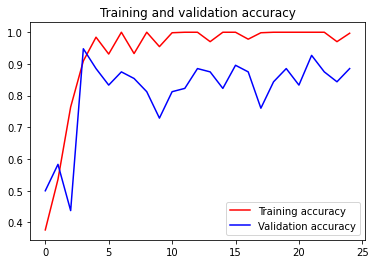

<Figure size 432x288 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt
import json

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

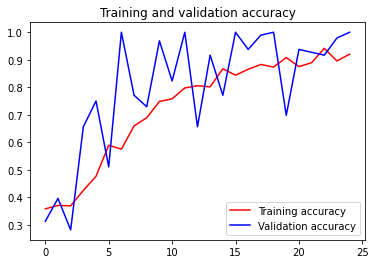

<Figure size 432x288 with 0 Axes>

In [43]:
import matplotlib.pyplot as plt
import json

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()  #after image augtaion

After the model has been fitted, we'll probably get accuracy about 100% on the training data quite quickly, but with the validation data getting to about 87% accuracy. 

The event is something called <font color=ffff00>**over-fitting**</font>, which happens when the model gets really good at spotting what it has seen before, but it is not so great at generalizing.

Think about it this way, for example, if all our life, the only shoes that we had ever seen were hiking boots, we probably wouldn't recognize high heels as shoes. This can be said that we would be <font color=ffff00>over-fitting</font> <font color=ff00ff>ourselves</font>. 

There are a number of methods to avoid this, and one of them is called <font color=00ffff>image augmentation</font>. (*This [part](https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/) has been left for students to further explore.*)

### Test the model

In [33]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import tensorflow as tf

# Reload the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model(WORK_DIR + '/tmp/rps.h5')
# Show the model architecture
#model.summary()

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving 1373309411-aoksign431-o.jpg to 1373309411-aoksign431-o.jpg
1373309411-aoksign431-o.jpg
[[1. 0. 0.]]


##Your exercise



---


#### Exercise 1

Try editing the convolutions. Change the number of convolutions from 32 to either 16 or 64. What impact does that have on accuracy and training time?

#### Exercise 2

Remove the final convolution. What impact does that have on accuracy or training time?

#### Exercise 3

Add more convolutions. What impact does that have?

#### Exercise 4

Remove all convolutions but the first. What impact does that have? Experiment with it.


---



### Advance Topic I





---


Go back to <font color=00ffff>Advanced Topic: Image augmentation test script</font> in section **2. The data**, and do a self-learning under the lecturer's supervision to re-plot the evaluation curves for comparison with the old ones. rorganize your code blocks, including with text blocks if it is necessary, below this line.

---

In [ ]:
# your exercise here

In [ ]:
print("Hello, World")
# http://bit.ly/2lXXdw5

### Advanced Topic II





---

https://developers.google.com/codelabs/tensorflow-5-compleximages#0



---



In [1]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip  -O /tmp/horse-or-human.zip

--2022-07-03 09:37:14--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 142.250.157.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  36.0MB/s    in 4.0s    

2022-07-03 09:37:18 (36.0 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
import os
import zipfile
 
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [3]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
 
# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse06-1.png', 'horse20-2.png', 'horse31-9.png', 'horse04-3.png', 'horse03-4.png', 'horse50-7.png', 'horse44-8.png', 'horse30-7.png', 'horse07-5.png', 'horse20-1.png']
['human16-22.png', 'human03-12.png', 'human14-01.png', 'human07-24.png', 'human10-06.png', 'human12-23.png', 'human11-07.png', 'human08-07.png', 'human14-30.png', 'human11-17.png']


In [5]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [6]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
 
# Index for iterating over images
pic_index = 0

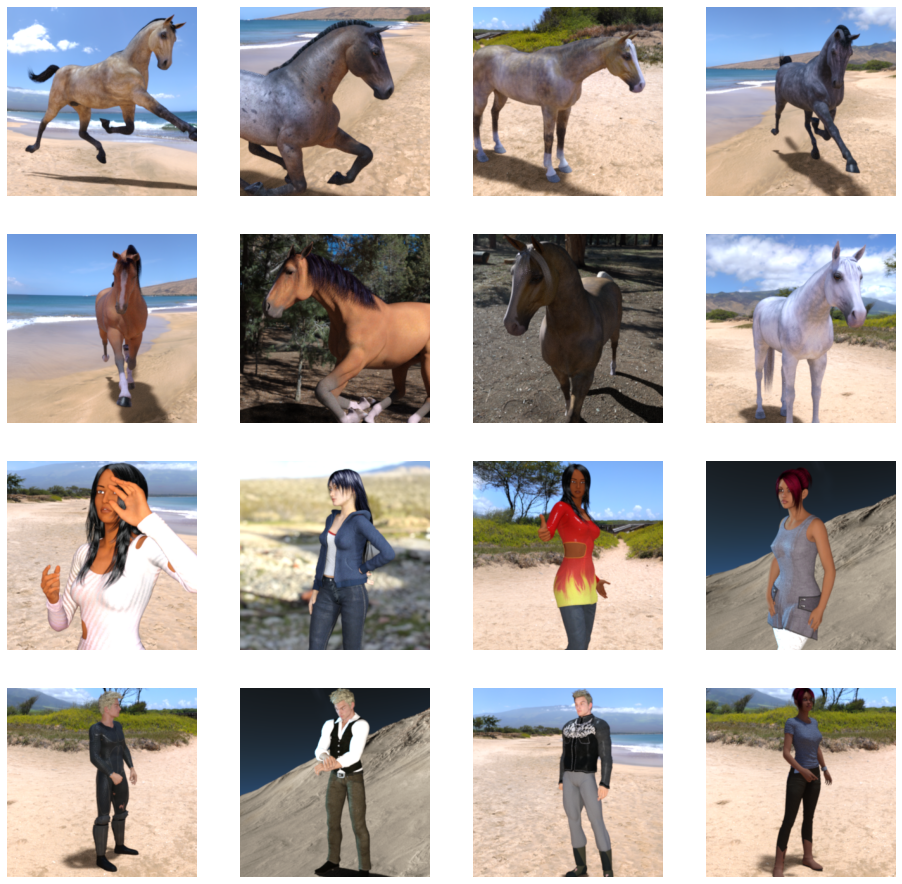

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
 
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]
 
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
 
  img = mpimg.imread(img_path)
  plt.imshow(img)
 
plt.show()
 

In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [10]:
from tensorflow.keras.optimizers import RMSprop
 
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
 
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [12]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 47s 5s/step - loss: 1.9859 - acc: 0.5328
Epoch 2/15
8/8 [==============================] - 42s 5s/step - loss: 0.6986 - acc: 0.7464
Epoch 3/15
8/8 [==============================] - 43s 5s/step - loss: 0.5382 - acc: 0.7909
Epoch 4/15
8/8 [==============================] - 47s 6s/step - loss: 0.2354 - acc: 0.9160
Epoch 5/15
8/8 [==============================] - 42s 5s/step - loss: 0.4169 - acc: 0.8888
Epoch 6/15
8/8 [==============================] - 42s 5s/step - loss: 0.3058 - acc: 0.9110
Epoch 7/15
8/8 [==============================] - 42s 5s/step - loss: 0.3699 - acc: 0.9010
Epoch 8/15
8/8 [==============================] - 43s 5s/step - loss: 0.0798 - acc: 0.9778
Epoch 9/15
8/8 [==============================] - 42s 5s/step - loss: 0.1508 - acc: 0.9433
Epoch 10/15
8/8 [==============================] - 42s 6s/step - loss: 0.1287 - acc: 0.9544
Epoch 11/15
8/8 [==============================] - 42s 5s/step - loss: 0.0181 - acc: 0.99

In [15]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving download.jpg to download (1).jpg
[1.]
download.jpg is a human


### Advanced Topic III





---

https://developers.google.com/codelabs/tensorflow-6-largecnns#0


---



In [16]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile


## My Playground


In [ ]:
# your code here

